In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
print(len(x_train))
print(len(x_test))

60000
10000


In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

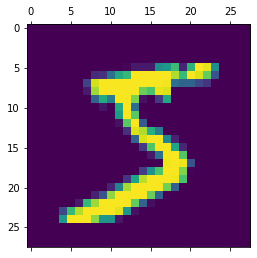

In [8]:
plt.matshow(x_train[0])

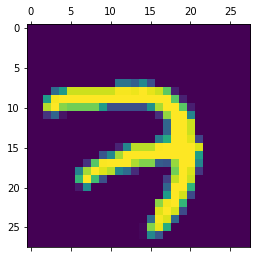

In [9]:
plt.matshow(x_train[5000])

In [10]:
y_train[5000]

7

In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [22]:
#x_train=x_train/255
#x_test=x_test/255

In [12]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [13]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [14]:
x_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
x_train_flattened=x_train_flattened/255
x_test_flattened=x_test_flattened/255

In [16]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4673 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9263


In [19]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 709us/step - loss: 0.2643 - accuracy: 0.9276


[0.2643245756626129, 0.9276000261306763]

In [20]:
y_pred=model.predict(x_test_flattened)

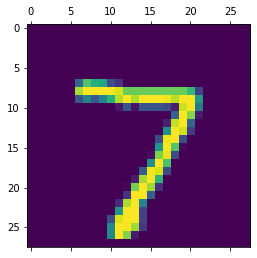

In [21]:
plt.matshow(x_test[0])

In [23]:
y_pred[0]

array([1.9389182e-02, 3.1657254e-07, 8.5482359e-02, 9.5747775e-01,
       3.2404959e-03, 1.6183573e-01, 2.7931715e-06, 9.9981976e-01,
       9.4324082e-02, 6.7552125e-01], dtype=float32)

In [24]:
np.argmax(y_pred[0])

7

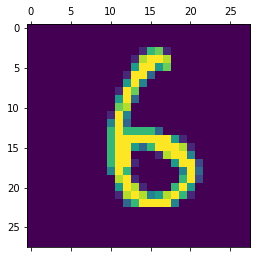

In [25]:
plt.matshow(x_test[3000])

In [26]:
np.argmax(y_pred[3000])

6

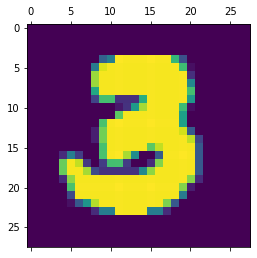

In [27]:
plt.matshow(x_test[200])

In [28]:
np.argmax(y_pred[200])

3

In [29]:
y_test[0:6]

array([7, 2, 1, 0, 4, 1], dtype=uint8)

In [30]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[0:6]

[7, 2, 1, 0, 4, 1]

In [31]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    8,  946,   15,    7,    3,   13,    8,   24,    5],
       [   2,    0,   28,  906,    0,   30,    2,   12,   21,    9],
       [   1,    1,   10,    0,  908,    0,   10,    4,    7,   41],
       [   7,    2,    4,   25,    7,  787,   17,    6,   29,    8],
       [   8,    3,    6,    1,    7,   12,  918,    2,    1,    0],
       [   1,    6,   28,    3,    8,    1,    0,  946,    1,   34],
       [   7,   10,   10,   16,    9,   26,   10,   12,  865,    9],
       [   9,    7,    2,    8,   23,    7,    0,   24,    5,  924]])>

Text(69.0, 0.5, 'Truth')

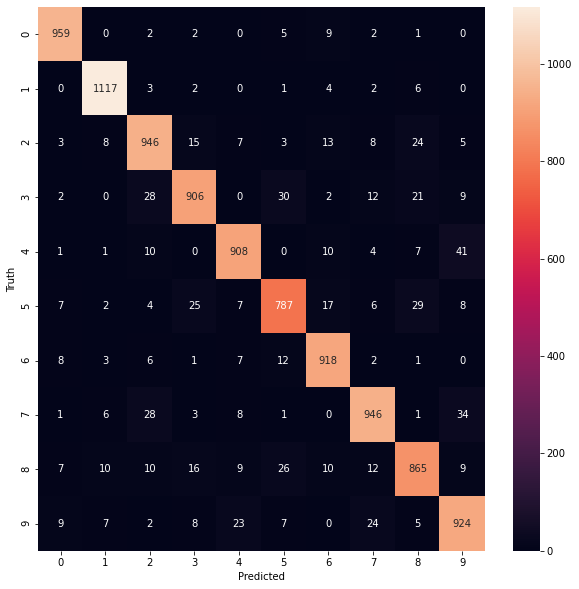

In [34]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    #100 is the number of neurons in hidden layer it is a random number less than 784,input shape
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2769 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1236 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0867 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0522 - accuracy: 0.9848


In [36]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9755


[0.07777421921491623, 0.9754999876022339]

In [38]:
y_pred=model.predict(x_test_flattened)

In [39]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[0:6]

[7, 2, 1, 0, 4, 1]

In [40]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    0,    2,    3,    2,    3,    0],
       [   0, 1124,    4,    0,    0,    2,    2,    0,    3,    0],
       [   3,    1, 1005,    1,    1,    0,    2,    9,   10,    0],
       [   0,    0,    9,  976,    0,    7,    0,    8,   10,    0],
       [   1,    0,    6,    0,  957,    0,    4,    2,    2,   10],
       [   2,    1,    0,    5,    2,  867,    3,    1,   11,    0],
       [   4,    3,    0,    1,    4,    3,  938,    0,    5,    0],
       [   1,    3,   10,    0,    0,    0,    0, 1003,    5,    6],
       [   3,    0,    4,    3,    3,    1,    2,    4,  953,    1],
       [   2,    5,    1,    7,   10,    6,    0,    5,   10,  963]])>

Text(69.0, 0.5, 'Truth')

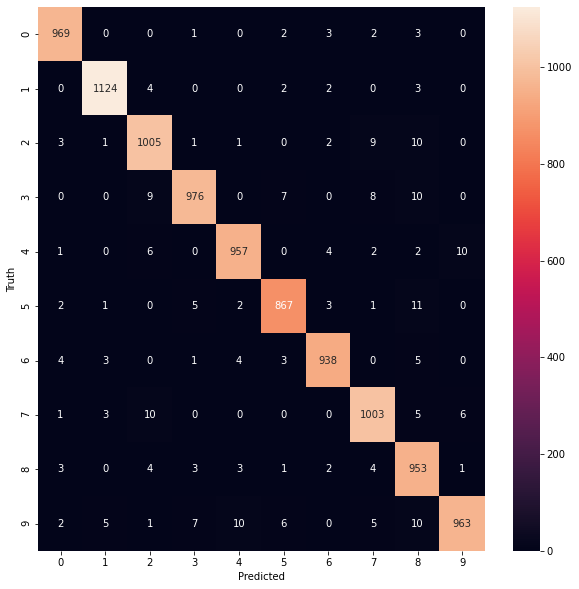

In [41]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
#Another way to fletten the image dimension
#keras.layers.Flatten(input_shape=(28,28))